In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("data/results.csv")


df["Time used in seconds"] = pd.to_numeric(df["Time used in seconds"])
df["Memory used in MB"] = pd.to_numeric(df["Memory used in MB"])
df["Amount of MAIDS"] = pd.to_numeric(df["Amount of MAIDS"])
df["Amount of Polygons"] = pd.to_numeric(df["Amount of Polygons"])
df["Combined_Method"] = df["Method"].str.cat(df["Spatial Accuracy (Resolution)"], sep="_")

df["Time per Polygon"] = df["Time used in seconds"]/df["Amount of Polygons"]
df["Time per MAID"] = df["Time used in seconds"]/df["Amount of MAIDS"]
df["Memory per Polygon"] = df["Memory used in MB"]/df["Amount of Polygons"]
df["Memory per MAID"] = df["Memory used in MB"]/df["Amount of MAIDS"]



filtered_df = df[(df["Amount of MAIDS"] == 1000000) & (df["Amount of Polygons"] == 100)]


In [4]:
def get_effectiveness(row):
    t_shapely = df[
        (df["Combined_Method"] == "Shapely_0.7m (5 Decimals)") &
        (df["Amount of MAIDS"] == row["Amount of MAIDS"]) &
        (df["Amount of Polygons"] == row["Amount of Polygons"])
    ]["Time used in seconds"]

    m_shapely = df[
        (df["Combined_Method"] == "Shapely_0.7m (5 Decimals)") &
        (df["Amount of MAIDS"] == row["Amount of MAIDS"]) &
        (df["Amount of Polygons"] == row["Amount of Polygons"])
    ]["Memory used in MB"]

    if t_shapely.empty or m_shapely.empty:
        raise ValueError
    relative_time = (row["Time used in seconds"] / t_shapely.iloc[0])
    relative_memory = (row["Memory used in MB"] / m_shapely.iloc[0])

    effectiveness = ( (relative_time * relative_memory) + (1 - row["Jaccard Index"]))

    return effectiveness, relative_time, relative_memory

df["Effectiveness"] = df.apply(lambda row: get_effectiveness(row)[0], axis=1)
df["relative_time"] = df.apply(lambda row: get_effectiveness(row)[1], axis=1)
df["relative_memory"] = df.apply(lambda row: get_effectiveness(row)[2], axis=1)


In [5]:
display(df) 

,Index,Method,Spatial Accuracy (Resolution),Amount of MAIDS,Amount of Polygons,Time used in seconds,Memory used in MB,Precision,Recall,F1,...,TP,FP,FN,Combined_Method,Time per Polygon,Time per MAID,Memory per Polygon,Memory per MAID,relative_time,relative_memory
0,1,Shapely,0.7m (5 Decimals),10000,1,2.1300,567.31,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,Shapely_0.7m (5 Decimals),2.130000,0.000213,567.3100,0.056731,1.000000,1.000000
1,2,Shapely,0.7m (5 Decimals),10000,10,7.5760,568.94,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,Shapely_0.7m (5 Decimals),0.757600,0.000758,56.8940,0.056894,1.000000,1.000000
2,3,Shapely,0.7m (5 Decimals),10000,100,6.8680,297.81,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,Shapely_0.7m (5 Decimals),0.068680,0.000687,2.9781,0.029781,1.000000,1.000000
3,4,Shapely,0.7m (5 Decimals),100000,1,0.9952,577.72,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,Shapely_0.7m (5 Decimals),0.995200,0.000010,577.7200,0.005777,1.000000,1.000000
4,5,Shapely,0.7m (5 Decimals),100000,10,6.6264,518.67,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,Shapely_0.7m (5 Decimals),0.662640,0.000066,51.8670,0.005187,1.000000,1.000000
5,6,Shapely,0.7m (5 Decimals),100000,100,63.5621,359.14,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,Shapely_0.7m (5 Decimals),0.635621,0.000636,3.5914,0.003591,1.000000,1.000000
6,7,Shapely,0.7m (5 Decimals),1000000,1,9.3067,1711.95,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,Shapely_0.7m (5 Decimals),9.306700,0.000009,1711.9500,0.001712,1.000000,1.000000
7,8,Shapely,0.7m (5 Decimals),1000000,10,65.0597,1430.28,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,Shapely_0.7m (5 Decimals),6.505970,0.000065,143.0280,0.001430,1.000000,1.000000
8,9,Shapely,0.7m (5 Decimals),1000000,100,638.6738,1444.80,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,Shapely_0.7m (5 Decimals),6.386738,0.000639,14.4480,0.001445,1.000000,1.000000
9,10,Shapely,7m (4 Decimals),10000,1,0.2135,567.05,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,Shapely_7m (4 Decimals),0.213500,0.000021,567.0500,0.056705,0.100235,0.999542


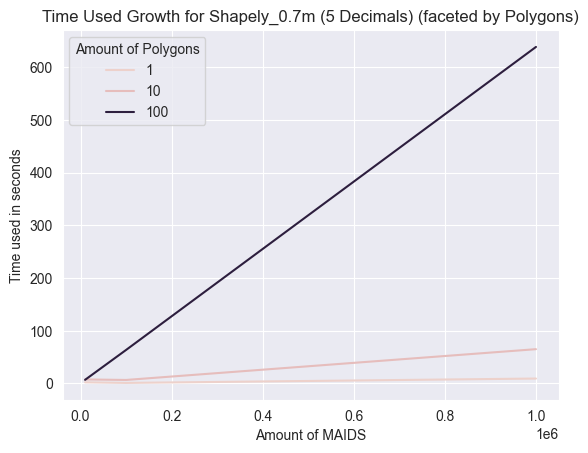

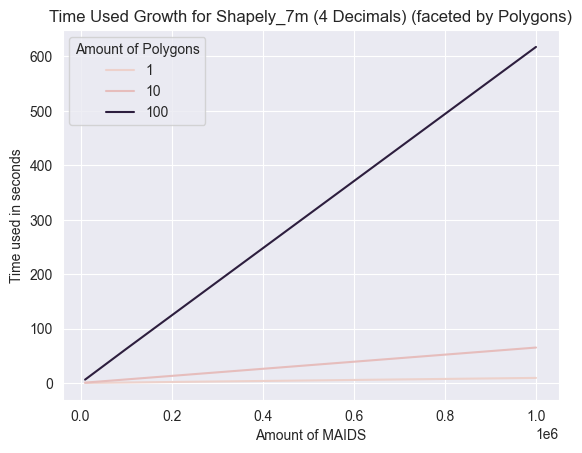

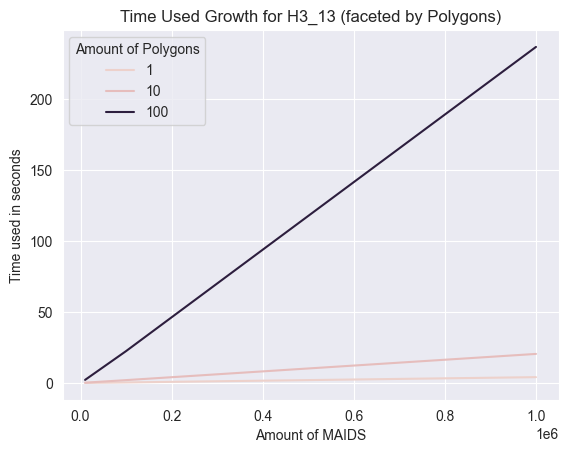

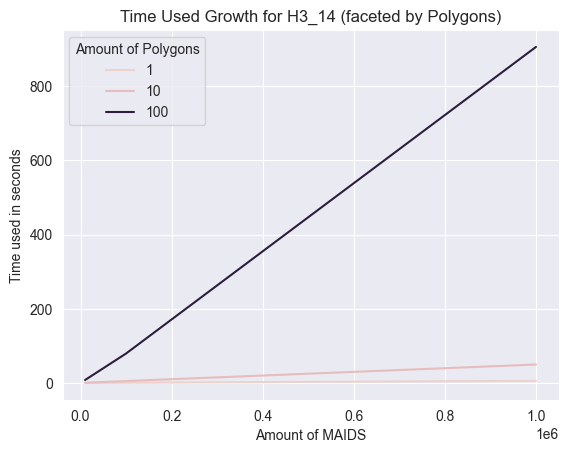

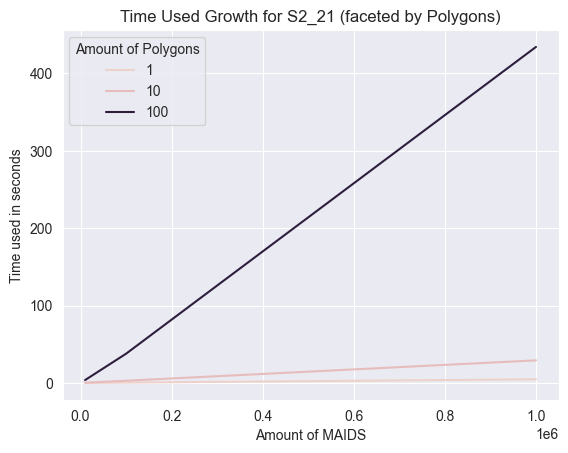

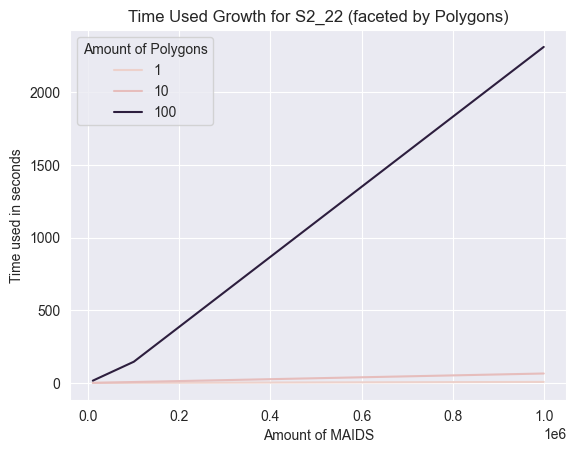

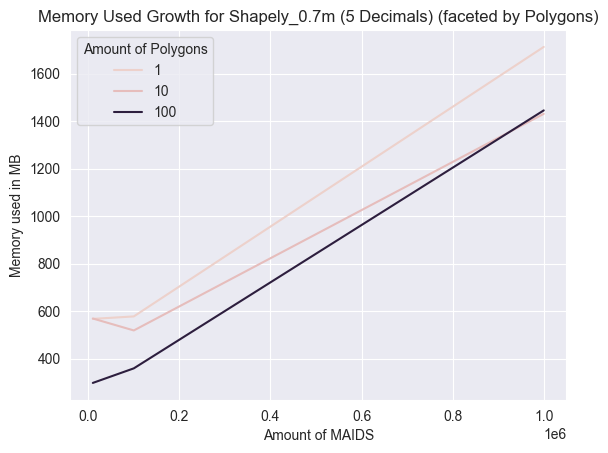

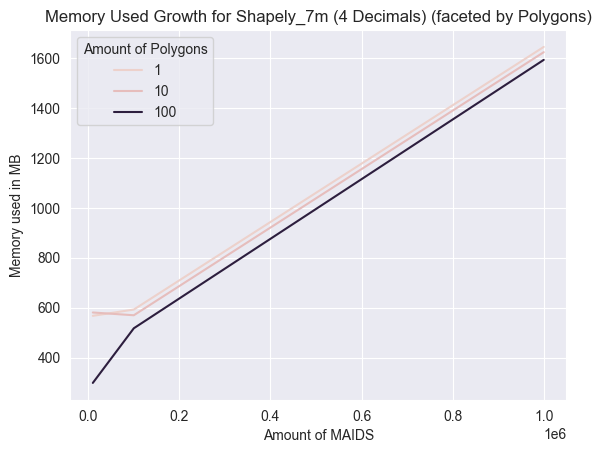

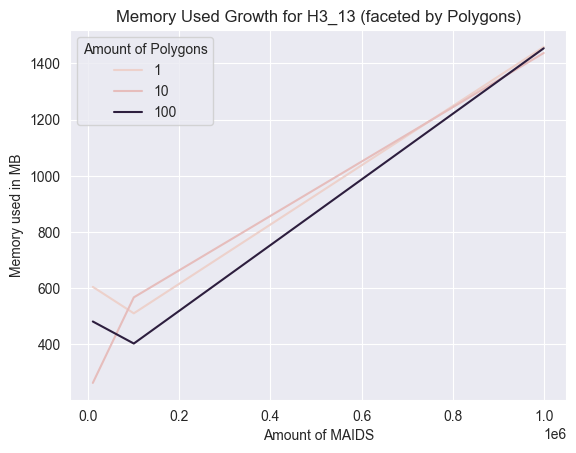

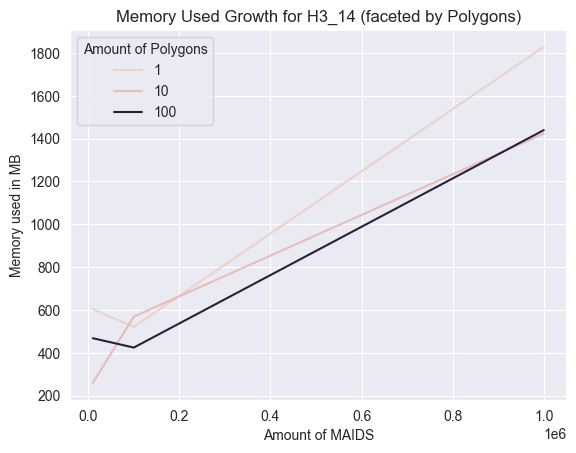

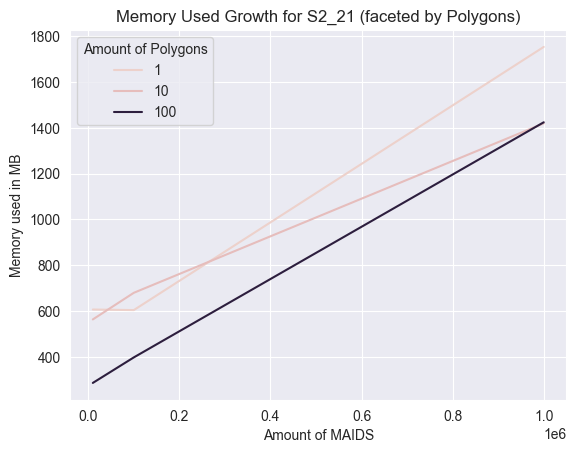

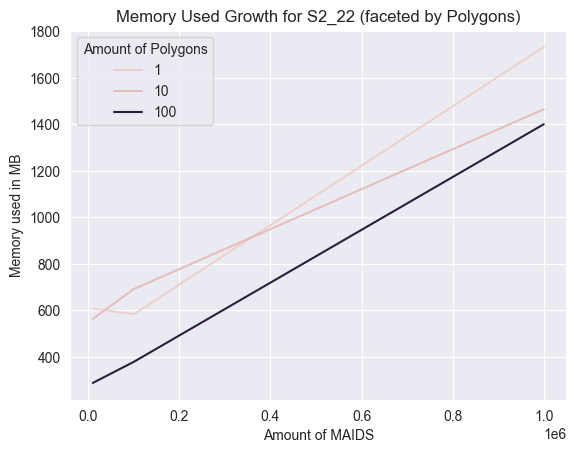

In [6]:
def plot_growth_seaborn(method, x_col, y_col, title):
  df_method = df[df["Combined_Method"] == method]
  sns.lineplot(x=x_col, y=y_col, hue="Amount of Polygons", data=df_method)
  plt.xlabel(x_col)
  plt.ylabel(y_col)
  plt.title(title)
  plt.legend(title="Amount of Polygons")
  plt.show()

for method in df["Combined_Method"].unique():
  plot_growth_seaborn(method, "Amount of MAIDS", "Time used in seconds", f"Time Used Growth for {method} (faceted by Polygons)")
for method in df["Combined_Method"].unique():
  plot_growth_seaborn(method, "Amount of MAIDS", "Memory used in MB", f"Memory Used Growth for {method} (faceted by Polygons)")

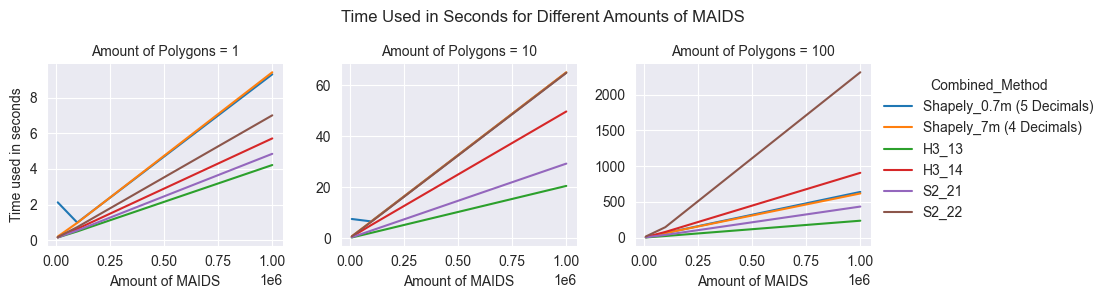

In [7]:
poly_values = [1, 10, 100]

g = sns.FacetGrid(df, col="Amount of Polygons", hue="Combined_Method", col_wrap=3, sharey=False)
g.map(sns.lineplot, "Amount of MAIDS", "Time used in seconds")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Time Used in Seconds for Different Amounts of MAIDS')
g.add_legend()
plt.show()

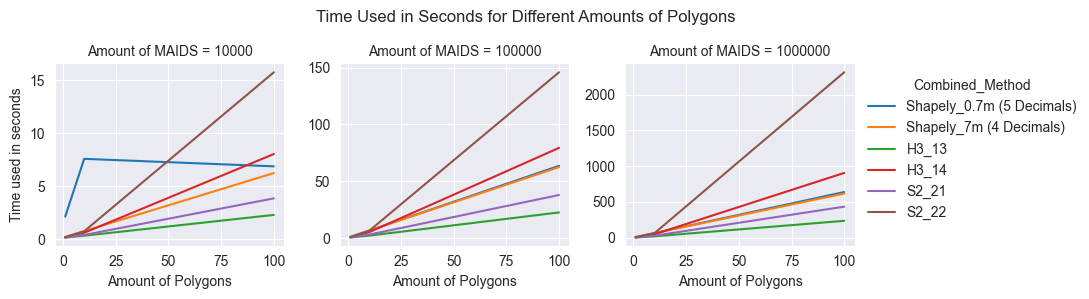

In [8]:
maids_values = [10000, 100000, 1000000]

g = sns.FacetGrid(df, col="Amount of MAIDS", hue="Combined_Method", col_wrap=3, sharey=False)
g.map(sns.lineplot, "Amount of Polygons", "Time used in seconds")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Time Used in Seconds for Different Amounts of Polygons')
g.add_legend()
plt.show()

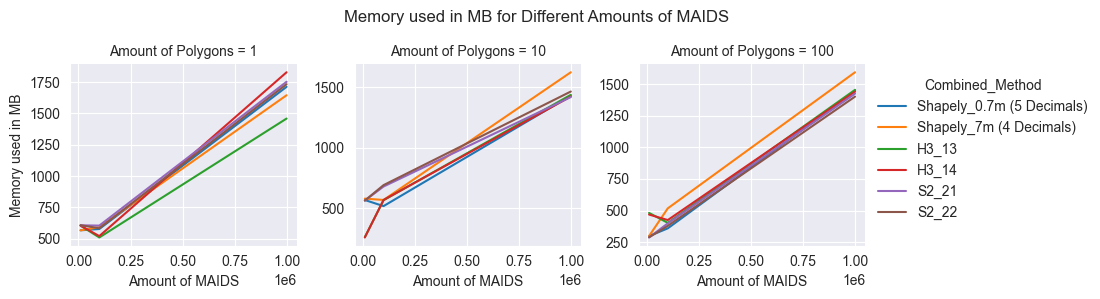

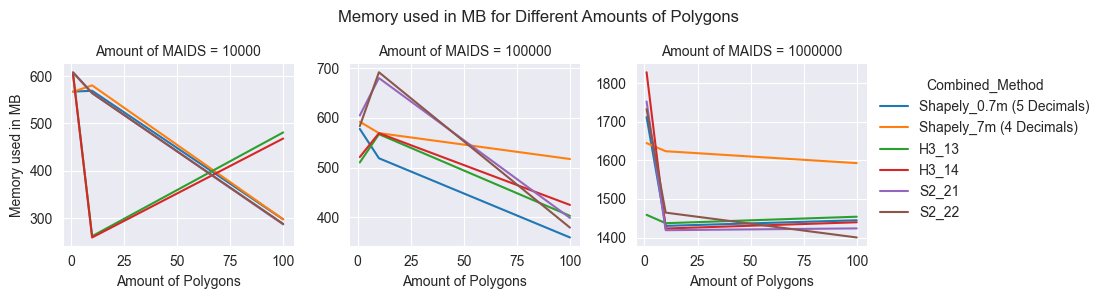

In [20]:
poly_values = [1, 10, 100]

g = sns.FacetGrid(df, col="Amount of Polygons", hue="Combined_Method", col_wrap=3, sharey=False)
g.map(sns.lineplot, "Amount of MAIDS", "Memory used in MB")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Memory used in MB for Different Amounts of MAIDS')
g.add_legend()
plt.show()

maids_values = [10000, 100000, 1000000]

g = sns.FacetGrid(df, col="Amount of MAIDS", hue="Combined_Method", col_wrap=3, sharey=False)
g.map(sns.lineplot, "Amount of Polygons", "Memory used in MB")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Memory used in MB for Different Amounts of Polygons')
g.add_legend()
plt.show()


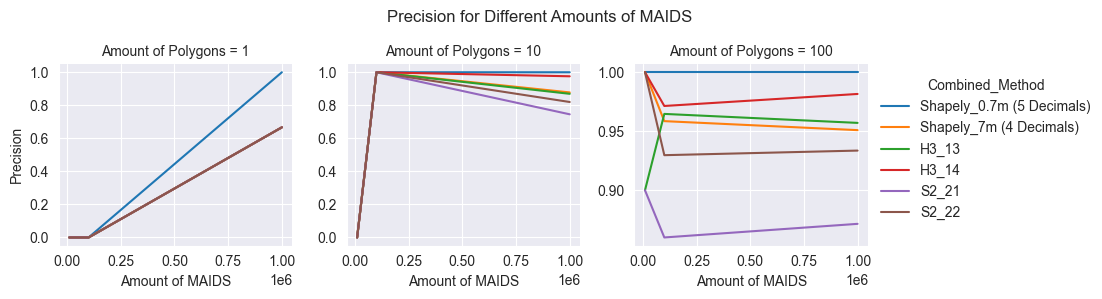

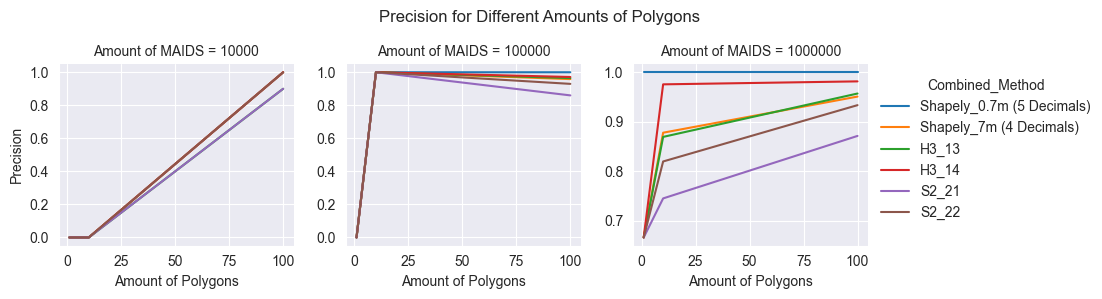

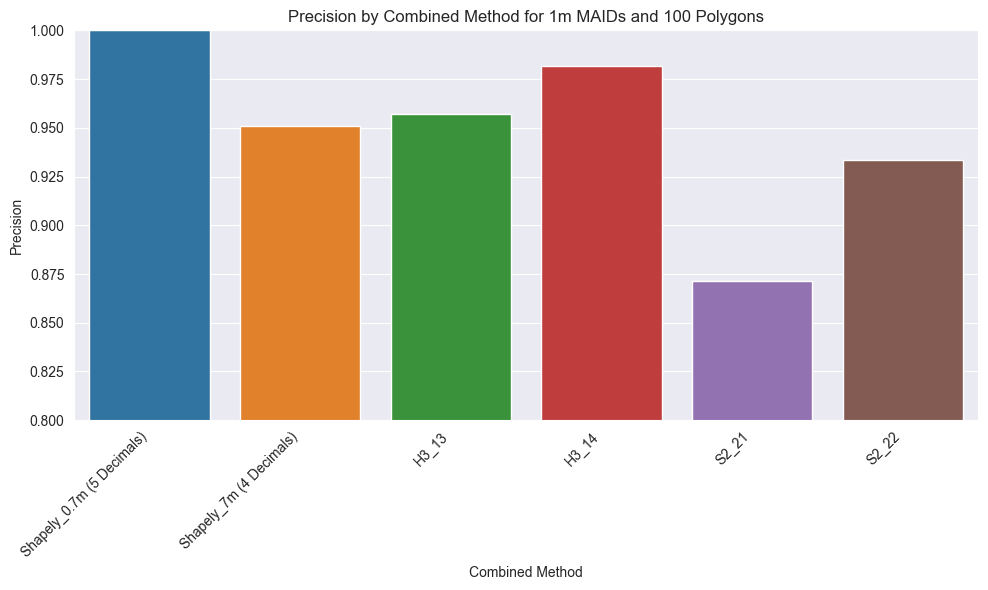

In [11]:
poly_values = [1, 10, 100]
g = sns.FacetGrid(df, col="Amount of Polygons", hue="Combined_Method", col_wrap=3, sharey=False)
g.map(sns.lineplot, "Amount of MAIDS", "Precision")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Precision for Different Amounts of MAIDS')
g.add_legend()  
plt.show()

maids_values = [10000, 100000, 1000000]
h = sns.FacetGrid(df, col="Amount of MAIDS", hue="Combined_Method", col_wrap=3, sharey=False)
h.map(sns.lineplot, "Amount of Polygons", "Precision")
plt.subplots_adjust(top=0.8)
h.fig.suptitle('Precision for Different Amounts of Polygons')
h.add_legend()

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x="Combined_Method", y="Precision", hue="Combined_Method")

# Set the y-axis limits
plt.ylim(0.8, 1)
plt.xlabel("Combined Method")
plt.ylabel("Precision")
plt.title("Precision by Combined Method for 1m MAIDs and 100 Polygons")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

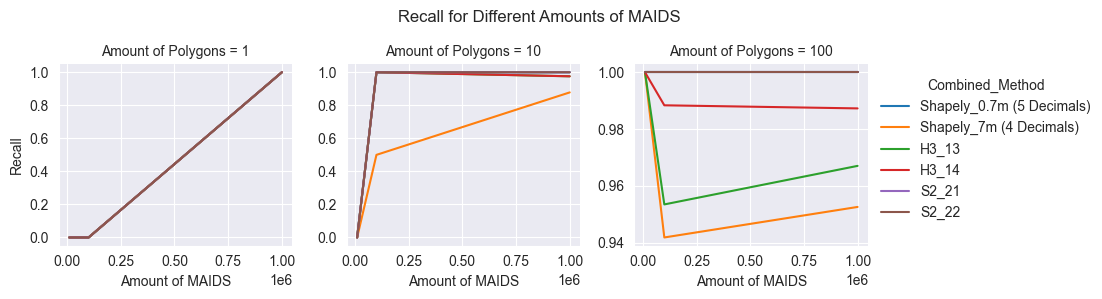

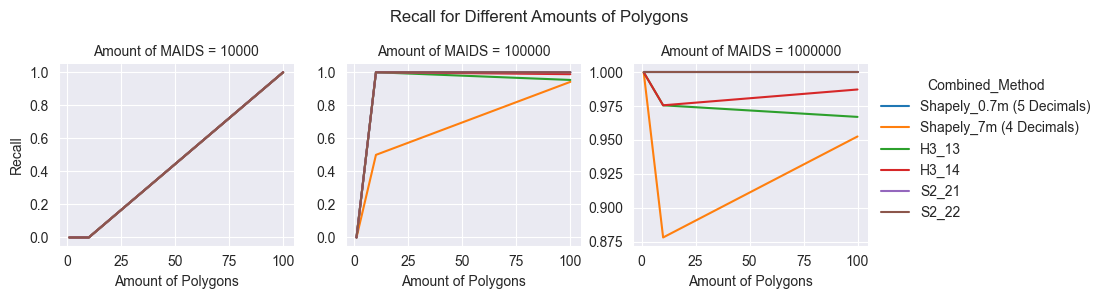

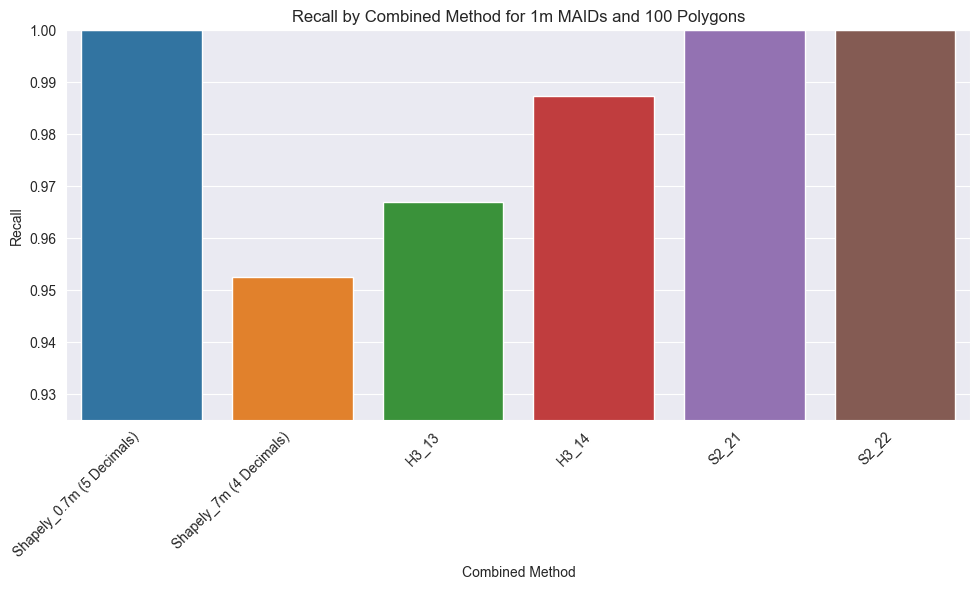

In [12]:
poly_values = [1, 10, 100]
g = sns.FacetGrid(df, col="Amount of Polygons", hue="Combined_Method", col_wrap=3, sharey=False)
g.map(sns.lineplot, "Amount of MAIDS", "Recall")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Recall for Different Amounts of MAIDS')
g.add_legend()
plt.show()

maids_values = [10000, 100000, 1000000]
h = sns.FacetGrid(df, col="Amount of MAIDS", hue="Combined_Method", col_wrap=3, sharey=False)
h.map(sns.lineplot, "Amount of Polygons", "Recall")
plt.subplots_adjust(top=0.8)
h.fig.suptitle('Recall for Different Amounts of Polygons')
h.add_legend()

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x="Combined_Method", y="Recall", hue="Combined_Method")

# Set the y-axis limits
plt.ylim(0.925, 1)
plt.xlabel("Combined Method")
plt.ylabel("Recall")
plt.title("Recall by Combined Method for 1m MAIDs and 100 Polygons")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

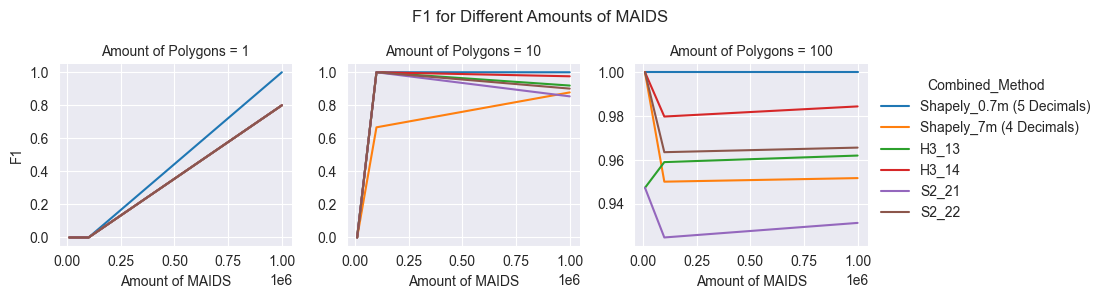

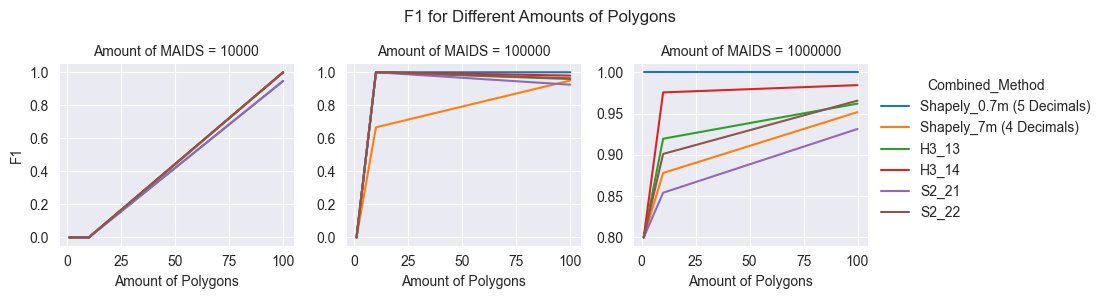

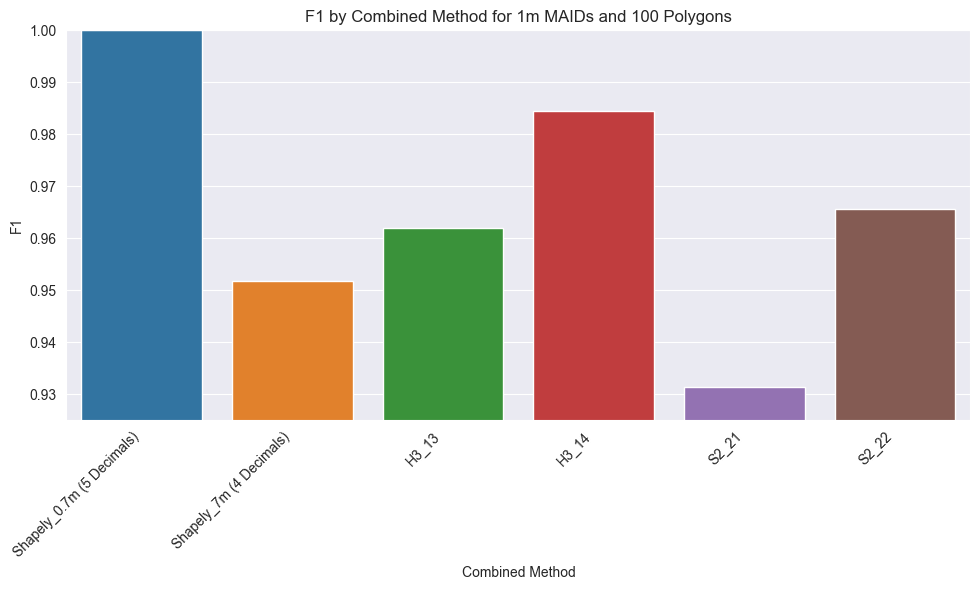

In [13]:
poly_values = [1, 10, 100]
g = sns.FacetGrid(df, col="Amount of Polygons", hue="Combined_Method", col_wrap=3, sharey=False)
g.map(sns.lineplot, "Amount of MAIDS", "F1")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('F1 for Different Amounts of MAIDS')
g.add_legend()
plt.show()

maids_values = [10000, 100000, 1000000]
h = sns.FacetGrid(df, col="Amount of MAIDS", hue="Combined_Method", col_wrap=3, sharey=False)
h.map(sns.lineplot, "Amount of Polygons", "F1")
plt.subplots_adjust(top=0.8)
h.fig.suptitle('F1 for Different Amounts of Polygons')
h.add_legend()

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x="Combined_Method", y="F1", hue="Combined_Method")

# Set the y-axis limits
plt.ylim(0.925, 1)
plt.xlabel("Combined Method")
plt.ylabel("F1")
plt.title("F1 by Combined Method for 1m MAIDs and 100 Polygons")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

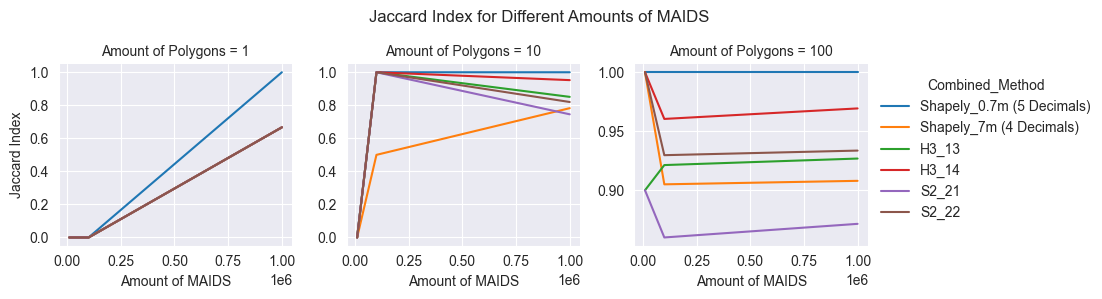

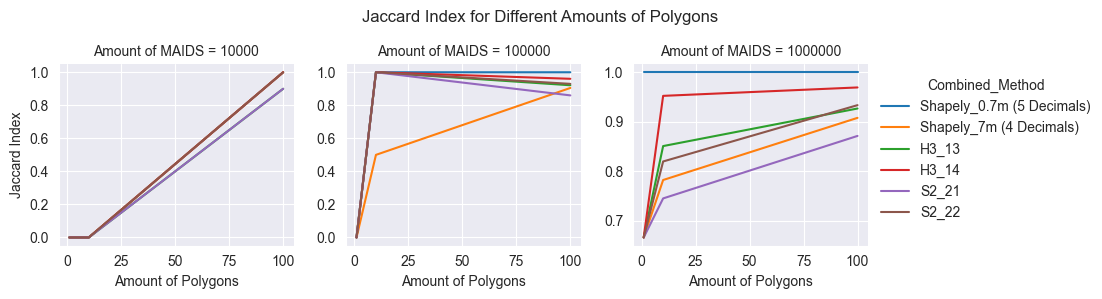

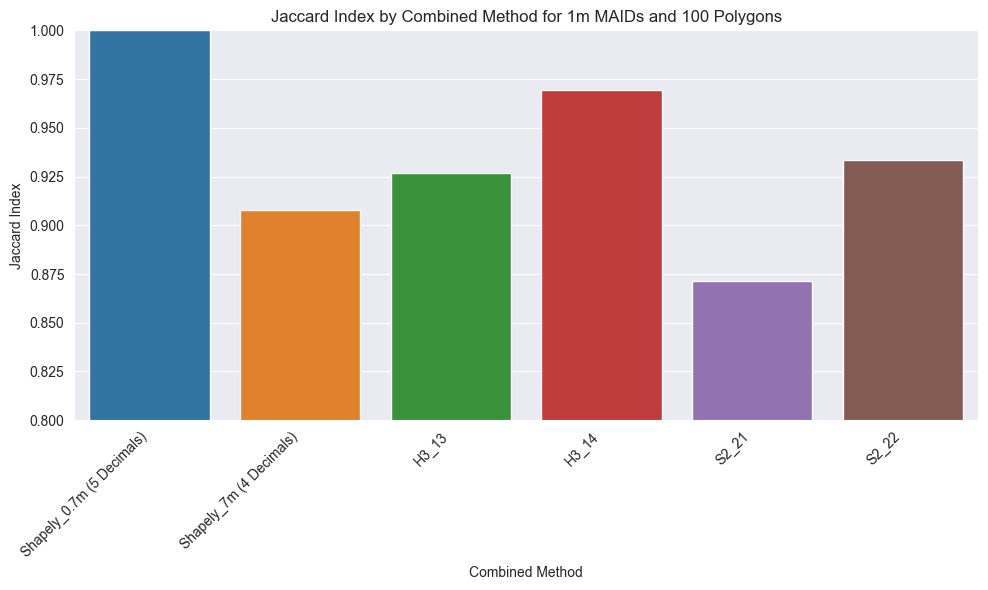

In [14]:
poly_values = [1, 10, 100]
g = sns.FacetGrid(df, col="Amount of Polygons", hue="Combined_Method", col_wrap=3, sharey=False)
g.map(sns.lineplot, "Amount of MAIDS", "Jaccard Index")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Jaccard Index for Different Amounts of MAIDS')
g.add_legend()
plt.show()

maids_values = [10000, 100000, 1000000]
h = sns.FacetGrid(df, col="Amount of MAIDS", hue="Combined_Method", col_wrap=3, sharey=False)
h.map(sns.lineplot, "Amount of Polygons", "Jaccard Index")
plt.subplots_adjust(top=0.8)
h.fig.suptitle('Jaccard Index for Different Amounts of Polygons')
h.add_legend()

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x="Combined_Method", y="Jaccard Index", hue="Combined_Method")

# Set the y-axis limits
plt.ylim(0.8, 1)
plt.xlabel("Combined Method")
plt.ylabel("Jaccard Index")
plt.title("Jaccard Index by Combined Method for 1m MAIDs and 100 Polygons")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
df_copy = df.copy()
weights = {
    (1, 10000): 0.05,
    (1, 100000): 0.1,
    (1, 1000000): 0.15,
    (10, 10000): 0.1,
    (10, 100000): 0.15,
    (10, 1000000): 0.2,
    (100, 10000): 0.15,
    (100, 100000): 0.15,
    (100, 1000000): 0.2,
}
total_weight_sum = sum(weights.values())
normalized_weights = {key: value / total_weight_sum for key, value in weights.items()}


def weighted_average(group):
    weighted_avgs = {}
    for column in ["Recall", "Precision", "F1", "Jaccard Index", "Effectiveness", "Time used in seconds", "Memory used in MB"]:
        group["Weight"] = group.apply(lambda row: normalized_weights.get((row["Amount of Polygons"], row["Amount of MAIDS"]), 0), axis=1)
        weighted_avg = (group[column] * group["Weight"]).sum() / group["Weight"].sum()
        weighted_avgs[column] = weighted_avg
    return pd.Series(weighted_avgs)

grouped = df_copy.groupby("Combined_Method")
weighted_avg_df = grouped.apply(weighted_average)

/var/folders/93/720j1n_x6z1bz8_fw6_c88w00000gn/T/ipykernel_27883/3744947507.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_df = grouped.apply(weighted_average)


In [16]:
display(weighted_avg_df)

,Recall,Precision,F1,Jaccard Index,Effectiveness,Time used in seconds,Memory used in MB
Combined_Method,,,,,,,
H3_13,0.785244,0.716030,0.745826,0.703031,0.648805,44.939696,897.7480
H3_14,0.792668,0.749727,0.767187,0.742732,1.238113,164.771336,939.5608
S2_21,0.800000,0.669919,0.726336,0.669919,0.842708,80.197416,946.8348
S2_22,0.800000,0.712147,0.750313,0.712147,1.889247,401.303200,945.5048
Shapely_0.7m (5 Decimals),0.800000,0.800000,0.800000,0.800000,1.200000,123.731840,920.9464
Shapely_7m (4 Decimals),0.705927,0.727670,0.702790,0.639099,1.333638,119.526348,994.6292


In [17]:
method_df = weighted_avg_df.copy()

method_mapping = {
    "Shapely": ["Shapely_0.7m (5 Decimals)", "Shapely_7m (4 Decimals)"],
    "S2": ["S2_21", "S2_22"],
    "H3": ["H3_13", "H3_14"],
}

method_avg_dict = {}
for method, combined_methods in method_mapping.items():
    combined_method_indices = [method_df.index.get_loc(cm) for cm in combined_methods if cm in method_df.index]
    method_data = method_df.iloc[combined_method_indices]
    method_avg_dict[method] = method_data.mean()

method_avg_df = pd.DataFrame(method_avg_dict)
method_avg_df = method_avg_df.T

In [18]:
display(method_avg_df)

,Recall,Precision,F1,Jaccard Index,Effectiveness,Time used in seconds,Memory used in MB
Shapely,0.752964,0.763835,0.751395,0.719550,1.266819,121.629094,957.7878
S2,0.800000,0.691033,0.738325,0.691033,1.365977,240.750308,946.1698
H3,0.788956,0.732878,0.756506,0.722881,0.943459,104.855516,918.6544
